In [1]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

# 211016
Russula 92번 이미지 깨져서 삭제  
깨진 이미지 있어도 진행하는 방법이 있어서 해보았으나 처리가 안됨 

In [2]:
def imshow(img):
    img = img /2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [3]:
import os

os.listdir('./Mushrooms_images')

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [4]:
trans = transforms.Compose([transforms.Resize((32,32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

trainset = torchvision.datasets.ImageFolder(root = "./Mushrooms_images",
                                           transform = trans)

In [5]:
len(trainset)

6713

In [6]:
trainloader = DataLoader(trainset,
                        batch_size = 2,
                        shuffle = True,
                        num_workers = 2)

In [7]:
classes = trainset.classes
classes

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([6, 3])


torch.Size([2, 3, 32, 32])
(3, 36, 70)
(36, 70, 3)
torch.Size([2, 3, 32, 32])
torch.Size([3, 36, 70])
Lactarius Cortinarius 


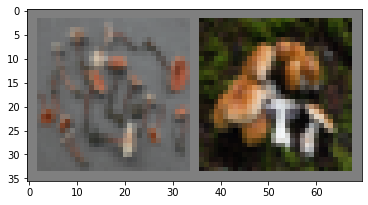

In [9]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=2)) # imshow 함수 호출
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(2)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # kernel=5, paddig=0. stride=1. 32-5+1=28
        self.pool = nn.MaxPool2d(2, 2)  # 14
        self.conv2 = nn.Conv2d(6, 16, 5) # kernel=5, paddig=0. stride=1. 14-5+1=10 => max pooling 후 5X5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 200 == 199:    
            print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.152
[1,   400] loss: 2.058
[1,   600] loss: 2.014
[1,   800] loss: 2.064
[1,  1000] loss: 2.013
[1,  1200] loss: 2.026
[1,  1400] loss: 2.061
[1,  1600] loss: 2.053
[1,  1800] loss: 1.986
[1,  2000] loss: 1.982
[1,  2200] loss: 1.964
[1,  2400] loss: 1.913
[1,  2600] loss: 1.942
[1,  2800] loss: 1.956
[1,  3000] loss: 1.962
[1,  3200] loss: 1.913
[2,   200] loss: 1.922
[2,   400] loss: 1.920
[2,   600] loss: 1.909
[2,   800] loss: 1.848
[2,  1000] loss: 1.842
[2,  1200] loss: 1.861
[2,  1400] loss: 1.860
[2,  1600] loss: 1.846
[2,  1800] loss: 1.860
[2,  2000] loss: 1.890
[2,  2200] loss: 1.837
[2,  2400] loss: 1.766
[2,  2600] loss: 1.885
[2,  2800] loss: 1.860
[2,  3000] loss: 1.811
[2,  3200] loss: 1.873
[3,   200] loss: 1.802
[3,   400] loss: 1.784
[3,   600] loss: 1.735
[3,   800] loss: 1.788
[3,  1000] loss: 1.748
[3,  1200] loss: 1.776
[3,  1400] loss: 1.726
[3,  1600] loss: 1.807
[3,  1800] loss: 1.755
[3,  2000] loss: 1.808
[3,  2200] loss: 1.852
[3,  2400] 

(3, 36, 70)
(36, 70, 3)
GroundTruth:  Boletus Boletus


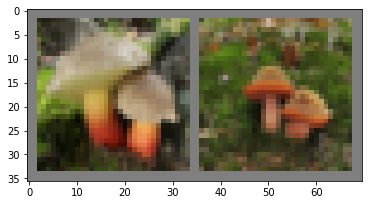

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
#images, labels = dataiter.next()
# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

Predicted:  Boletus Boletus


In [16]:
dataiter = iter(trainloader)
correct = 0
for i in range(2000):
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    
    for j in range(2):
        if labels[j] == predicted[j]:
            correct += 1

print('%.3f' % (correct/(i*2) * 100), '%')            
  

57.379 %
